In [10]:
# Import required libraries
import time
import numpy as np
import tensorflow as tf
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import tensorflow_hub as hub


In [11]:
# content_path = tf.keras.utils.get_file('my.jpg','https://www.w3schools.com/w3images/lights.jpg')
# style_path = tf.keras.utils.get_file('style23.jpg','https://storage.googleapis.com/khanhlvg-public.appspot.com/arbitrary-style-transfer/style23.jpg')

content_path = '/content/drive/MyDrive/mist 4-2 sessional/cse444_pr/PR project/content/my_pic.jpg'
style_path = '/content/drive/MyDrive/mist 4-2 sessional/cse444_pr/PR project/style/candy.jpg'
# Load content and style images
content_image = plt.imread(content_path)
style_image = plt.imread(style_path)

In [12]:
# Convert images to float32 numpy arrays, add batch dimension, and normalize to range [0, 1]
content_image = content_image.astype(np.float32)[np.newaxis, ...] / 255.
style_image = style_image.astype(np.float32)[np.newaxis, ...] / 255.
# Optionally resize the style image to 256x256 (recommended size for style image)
style_image = tf.image.resize(style_image, (256, 256))


In [13]:
# Load image stylization module.
hub_module = hub.load('https://kaggle.com/models/google/arbitrary-image-stylization-v1/frameworks/TensorFlow1/variations/256/versions/1')

In [14]:
# Stylize the content image using the style image
outputs = hub_module(tf.constant(content_image), tf.constant(style_image))


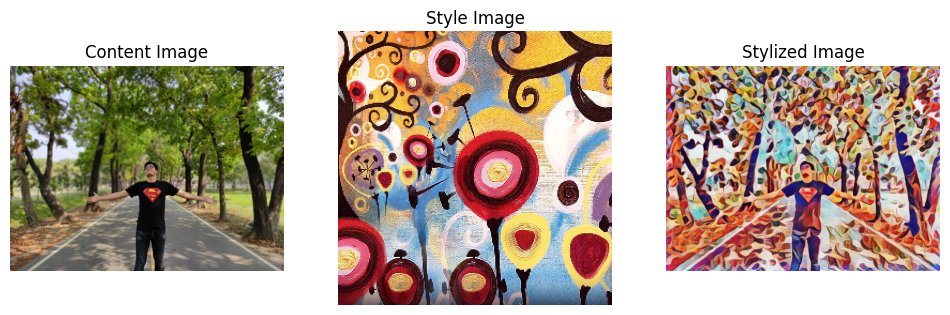

In [15]:
# Extract the stylized image from the outputs
stylized_image = outputs[0]

# Display the original content, style, and stylized images
plt.figure(figsize=(12, 12))

# Content image
plt.subplot(1, 3, 1)
plt.imshow(content_image[0])
plt.title('Content Image')
plt.axis('off')

# Style image
plt.subplot(1, 3, 2)
plt.imshow(style_image[0])
plt.title('Style Image')
plt.axis('off')

# Stylized image
plt.subplot(1, 3, 3)
plt.imshow(stylized_image[0])
plt.title('Stylized Image')
plt.axis('off')

plt.show()
